# APPROACHES TO HANDLE IMBALANCED DATA

We are considering a fraudulent transaction dataset from kaggle [(dataset)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download). 
<br>
<br>
As there will be very less number of fraud transaction as compared to legit transactions, We will have a purely imbalanced dataset.
<br>
I have applied various techniques to balance the data set and compared the metrics before and after applying the techniques.
<br>
<br>
**Approaches:**
<br>
1. Blind Copy (Upsampling or Downsampling)
2. SMOTE (Synthetic Minority Oversampling Technique)
3. Ensemble Approach
<br>
<br>
**Metrics Used for Comparision**

1. **Precision** : It gives us the proportion of positive identifications which were actually correct.Precision is the ratio between the True Positives and all the Positives. (TP/TP+FP). Value lies between (0-1)
2. **Recall** : It gives us the proportion of actual positives Which was identified correctly.  measure of our model correctly identifying True Positives. (TP/TP+FN). Value lies between (0-1)
3. **F1 score** : F1-score is the Harmonic mean of the Precision and Recall. It is non negative and ranges between 0-1. It is difficult to balance precision and recall and both of them are standalone not very important, so F1 servers as a trade off between both and an important metric.
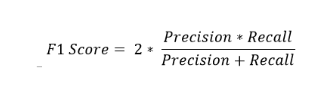
4. **ROC AUC score** : AUC - ROC score is a performance measurement for the classification problems. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.


In [95]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [2]:
data= pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df= pd.DataFrame(data)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Normalized_Amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [6]:
# drop Time and Amount columns as they are not relevant for prediction purpose 


df = df.drop(['Time', 'Amount'], axis = 1)

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

We have a clear imbalanced dataset

In [8]:
X= df.drop(['Class'],axis=1)
y= df['Class']

In [9]:
Count_of_class_0,Count_of_class_1=y.value_counts()

In [10]:
Count_of_class_0,Count_of_class_1

(284315, 492)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train, y_train.ravel())
predictions = lr.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



### Without handling imbalance data

In [14]:
print(roc_auc_score(y_test,predictions))

0.8167525428084921


In [15]:
print ('Count of class 0 before SMOTE= {}'.format(Count_of_class_0))
print ('Count of class 1 before SMOTE= {}'.format(Count_of_class_1))

Count of class 0 before SMOTE= 284315
Count of class 1 before SMOTE= 492


# Approaches to handle Imbalanced Data

## Blind Copy (Up Sampling or Down Sampling)

### Down Sampling

In [16]:
#count of each class
class_0,class_1 = df.Class.value_counts()
print (class_0,',',class_1)

284315 , 492


In [17]:
#Divide the data set on the basisi of class 0 and 1

df_class_0 = df[df['Class']==0]
df_class_1 = df[df['Class']==1]

In [18]:
print(len(df_class_0),len(df_class_1))

284315 492


In [19]:
#under sample class 0 to match class 1
df_class_0_undersample = df_class_0.sample(class_1)

In [20]:
df_undersample = pd.concat([df_class_0_undersample,df_class_1],axis=0)

In [21]:
df_undersample.shape

(984, 30)

In [22]:
df_undersample.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
92993,-0.358567,-0.825828,1.236936,-1.584633,-0.223495,0.232184,-0.655195,0.127449,-2.895535,1.364843,...,0.005431,0.274225,0.051949,-0.653111,-0.369366,-0.084303,0.164024,0.140513,0,-0.143090
47462,1.072664,0.245515,0.826661,2.782493,-0.416651,-0.133772,-0.015318,-0.008210,-0.167114,0.505027,...,-0.056066,-0.079235,-0.114772,0.407718,0.601756,0.073358,-0.001138,0.027528,0,-0.161361


In [23]:
X_under= df_undersample.drop(['Class'],axis=1)
y_under= df_undersample['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train_under,X_test_under,y_train_under,y_test_under= train_test_split(X_under,y_under,test_size=0.2,random_state=15,stratify=y_under)

In [26]:
y_train_under.value_counts()

1    394
0    393
Name: Class, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train_under, y_train_under.ravel())
predictions_under = lr.predict(X_test_under)
print(classification_report(y_test_under, predictions_under))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [28]:
print(roc_auc_score(y_test_under,predictions_under))

0.933879612451041


### Comparing results before and after Downsampling

In [91]:
print('Report Before Downsampling\n',classification_report(y_test, predictions))
print('Report After Downsampling\n',classification_report(y_test_under, predictions_under))

print('-------------------------------------------------------------------------------')

print('ROC_AUC Score Before DownSampling',roc_auc_score(y_test,predictions))
print('ROC_AUC Score After DownSampling',roc_auc_score(y_test_under,predictions_under))

Report Before Downsampling
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Report After Downsampling
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

-------------------------------------------------------------------------------
ROC_AUC Score Before DownSampling 0.8167525428084921
ROC_AUC Score After DownSampling 0.933879612451041


### Up Sampling

In [30]:
#under sample class 0 to match class 1
df_class_1_upsample = df_class_1.sample(class_0,replace=True)

In [31]:
df_upsample = pd.concat([df_class_0,df_class_1_upsample],axis=0)

In [32]:
df_upsample['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [33]:
X_upsample= df_upsample.drop(['Class'],axis=1)
y_upsample= df_upsample['Class']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train_up,X_test_up,y_train_up,y_test_up= train_test_split(X_upsample,y_upsample,test_size=0.2,random_state=15,stratify=y_upsample)

In [36]:
y_test_up.value_counts()

0    56863
1    56863
Name: Class, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train_up, y_train_up.ravel())
predictions_up = lr.predict(X_test_up)
print(classification_report(y_test_up, predictions_up))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.98      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [38]:
print(roc_auc_score(y_test_up,predictions_up))

0.9495629847176548


### Comparing results before and after UpSampling

In [90]:
print('Report Before Upsampling\n',classification_report(y_test, predictions))
print('Report After Upsampling\n',classification_report(y_test_up, predictions_up))

print('-------------------------------------------------------------------------------')

print('ROC_AUC Score Before UpSampling',roc_auc_score(y_test,predictions))
print('ROC_AUC Score After UpSampling',roc_auc_score(y_test_up,predictions_up))

Report Before Upsampling
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Report After Upsampling
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.98      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

-------------------------------------------------------------------------------
ROC_AUC Score Before UpSampling 0.8167525428084921
ROC_AUC Score After UpSampling 0.9495629847176548


## SMOTE (Synthetic Minority Oversampling Technique)

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority',random_state=2)
X_smote, y_smote = sm.fit_resample(X, y)

In [41]:
Count_of_class_0_smote,Count_of_class_1_smote = y_smote.value_counts()

In [42]:
print ('Count of class 0 after SMOTE= {}'.format(Count_of_class_0_smote))
print ('Count of class 1 after SMOTE= {}'.format(Count_of_class_1_smote))

Count of class 0 after SMOTE= 284315
Count of class 1 after SMOTE= 284315


In [43]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote= train_test_split(X_smote,y_smote,test_size=0.2,
                                                                        random_state=0,stratify=y_smote)

In [44]:
y_train_smote.value_counts()

0    227452
1    227452
Name: Class, dtype: int64

In [45]:
y_test_smote.value_counts()

0    56863
1    56863
Name: Class, dtype: int64

In [46]:
lr=LogisticRegression()

lr.fit(X_train_smote, y_train_smote)
predictions_smote = lr.predict(X_test_smote)
print(classification_report(y_test_smote, predictions_smote))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [47]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test_smote,predictions_smote))

0.9460017937850623


### Comparing results before and after SMOTE

In [89]:
print('Report Before SMOTE\n',classification_report(y_test, predictions))
print('Report After SMOTE\n',classification_report(y_test_smote, predictions_smote))

print('-------------------------------------------------------------------------------')

print('ROC_AUC Score Before SMOTE',roc_auc_score(y_test,predictions))
print('ROC_AUC Score After SMOTE',roc_auc_score(y_test_smote,predictions_smote))

Report Before SMOTE
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Report After SMOTE
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56863
           1       0.97      0.92      0.94     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

-------------------------------------------------------------------------------
ROC_AUC Score Before SMOTE 0.8167525428084921
ROC_AUC Score After SMOTE 0.9460017937850623


## Ensemble Approach

**Ensemble with Undersampling**

In [49]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [50]:
492* 5

2460

In [51]:
df1_class_0 = df[df.Class==0]
df1_class_0

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


In [52]:
df1_class_1 = df[df.Class==1]
df1_class_1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.206024
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041818
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.626302


In [53]:
df1_class_0_undersample = df1_class_0.sample(2460)

In [54]:
df1_class_0_undersample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
18157,-1.198010,0.940113,1.882725,-1.777537,0.271697,-0.269104,1.067570,-0.483564,1.363767,1.533524,...,-0.351083,-0.100899,-0.137107,-0.017812,-0.410424,0.642559,0.022835,-0.490987,0,-0.351350
52636,-0.764880,0.912576,1.145161,-0.044254,-0.397204,-0.251839,0.239771,0.629076,-0.750852,-0.564433,...,0.009879,-0.268087,0.251581,0.169430,-0.824244,-0.013265,-0.017678,0.086822,0,-0.191707
109400,-1.778359,1.009105,1.084493,-2.181734,-0.699954,0.164116,-0.648842,1.229041,1.112162,-1.689828,...,-0.025700,0.016088,-0.429559,-0.839091,0.813665,-0.686872,0.226648,0.024275,0,-0.326242
208770,-0.000648,1.096931,-1.040535,-0.284066,0.532695,-0.843000,0.499883,0.327959,-0.347301,-0.985229,...,0.358775,0.955563,-0.183368,-0.582681,-0.335627,-0.140418,-0.014391,0.022290,0,-0.301854
5793,1.338912,0.689267,-0.290811,1.103417,0.635634,-0.642557,0.535783,-0.462001,0.857157,-0.364019,...,-0.186557,-0.161402,-0.254573,-0.470903,0.987039,-0.287043,-0.026841,-0.001069,0,-0.344873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227544,-1.306677,3.516810,-0.455597,4.028724,1.718825,-0.200484,2.257602,-1.775629,1.468549,6.004652,...,-1.100492,-0.939692,-0.017286,-0.351662,-0.361138,-0.156594,-0.128967,-1.015595,0,-0.340995
59519,-0.490897,-0.010887,1.775204,-1.678298,-1.186766,-0.712139,-0.272363,-0.132180,-2.449266,1.367705,...,-0.199051,-0.134484,-0.215173,0.315228,0.273147,-0.063251,0.197333,0.140407,0,-0.273268
150750,1.991539,0.499805,-1.604847,1.574324,0.551368,-1.714568,0.922738,-0.740806,0.901727,-0.026121,...,0.080465,0.583428,-0.038703,0.438722,0.506461,-0.488989,-0.063228,-0.061248,0,-0.209298
64937,-1.373284,1.138689,1.292813,0.882136,-0.657962,0.308503,-0.293909,0.656608,0.220091,0.261947,...,0.212673,0.819151,-0.286724,0.028201,-0.114177,-0.205065,0.201156,0.178626,0,-0.233127


In [55]:
df1 = pd.concat([df1_class_0_undersample,df1_class_1],axis=0)
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
18157,-1.198010,0.940113,1.882725,-1.777537,0.271697,-0.269104,1.067570,-0.483564,1.363767,1.533524,...,-0.351083,-0.100899,-0.137107,-0.017812,-0.410424,0.642559,0.022835,-0.490987,0,-0.351350
52636,-0.764880,0.912576,1.145161,-0.044254,-0.397204,-0.251839,0.239771,0.629076,-0.750852,-0.564433,...,0.009879,-0.268087,0.251581,0.169430,-0.824244,-0.013265,-0.017678,0.086822,0,-0.191707
109400,-1.778359,1.009105,1.084493,-2.181734,-0.699954,0.164116,-0.648842,1.229041,1.112162,-1.689828,...,-0.025700,0.016088,-0.429559,-0.839091,0.813665,-0.686872,0.226648,0.024275,0,-0.326242
208770,-0.000648,1.096931,-1.040535,-0.284066,0.532695,-0.843000,0.499883,0.327959,-0.347301,-0.985229,...,0.358775,0.955563,-0.183368,-0.582681,-0.335627,-0.140418,-0.014391,0.022290,0,-0.301854
5793,1.338912,0.689267,-0.290811,1.103417,0.635634,-0.642557,0.535783,-0.462001,0.857157,-0.364019,...,-0.186557,-0.161402,-0.254573,-0.470903,0.987039,-0.287043,-0.026841,-0.001069,0,-0.344873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.206024
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041818
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.626302


In [56]:
df1.Class.value_counts()

0    2460
1     492
Name: Class, dtype: int64

In [57]:
X_df1 = df1.drop('Class',axis='columns')
y_df1 = df1['Class']

In [58]:
X_df1= X_df1.reset_index(drop=True)

In [59]:
y_df1= y_df1.reset_index(drop=True)

In [60]:
X_train, X_test_ensemble, y_train, y_test_ensemble = train_test_split(X_df1, y_df1, test_size=0.2, random_state=15, stratify=y_df1)

In [61]:
y_train.value_counts()

0    1967
1     394
Name: Class, dtype: int64

In [62]:
df2= X_train.copy()
df2['Class'] = y_train

In [63]:
df2.Class.value_counts()

0    1967
1     394
Name: Class, dtype: int64

In [64]:
def training_batch(major_class, minor_class, start, end):
    df_train = pd.concat([major_class[start:end], minor_class], axis=0)

    X_train = df_train.drop('Class', axis='columns')
    y_train = df_train.Class
    return X_train, y_train  

In [65]:
df2_class_0 = df2[df2.Class==0]
df2_Class_1 = df2[df2.Class==1]

In [68]:
df2_Class_1.shape,df2_class_0.shape

((394, 30), (1967, 30))

In [69]:
X_train_ensemble_1,y_train_ensemble_1 = training_batch(df2_class_0,df2_Class_1,0,394)

lr=LogisticRegression()

lr.fit(X_train_ensemble_1, y_train_ensemble_1)
predictions_ensemble_1 = lr.predict(X_test_ensemble)

In [70]:
X_train_ensemble_2,y_train_ensemble_2 = training_batch(df2_class_0,df2_Class_1,394,788)

lr=LogisticRegression()

lr.fit(X_train_ensemble_2, y_train_ensemble_2)
predictions_ensemble_2 = lr.predict(X_test_ensemble)

In [71]:
X_train_ensemble_3,y_train_ensemble_3 = training_batch(df2_class_0,df2_Class_1,788,1182)

lr=LogisticRegression()

lr.fit(X_train_ensemble_3, y_train_ensemble_3)
predictions_ensemble_3 = lr.predict(X_test_ensemble)

In [72]:
X_train_ensemble_4,y_train_ensemble_4 = training_batch(df2_class_0,df2_Class_1,1182,1576)

lr=LogisticRegression()

lr.fit(X_train_ensemble_4, y_train_ensemble_4)
predictions_ensemble_4 = lr.predict(X_test_ensemble)

In [73]:
X_train_ensemble_5,y_train_ensemble_5 = training_batch(df2_class_0,df2_Class_1,1576,1967)

lr=LogisticRegression()

lr.fit(X_train_ensemble_5, y_train_ensemble_5)
predictions_ensemble_5 = lr.predict(X_test_ensemble)

In [76]:
len(predictions_ensemble_1),len(predictions_ensemble_2),len(predictions_ensemble_3),len(predictions_ensemble_4),len(predictions_ensemble_5)

(591, 591, 591, 591, 591)

In [79]:
final_prediction_ensemble = predictions_ensemble_1.copy()
for i in range(len(predictions_ensemble_1)):
    vote = predictions_ensemble_1[i] + predictions_ensemble_2[i] + predictions_ensemble_3[i] + predictions_ensemble_4[i] + predictions_ensemble_5[i]
    if vote>2:
        final_prediction_ensemble[i] = 1
    else:
        final_prediction_ensemble[i] = 0

In [80]:
len(final_prediction_ensemble)

591

In [81]:
final_prediction_ensemble

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [82]:
print(classification_report(y_test_ensemble, final_prediction_ensemble))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       493
           1       0.88      0.90      0.89        98

    accuracy                           0.96       591
   macro avg       0.93      0.94      0.93       591
weighted avg       0.96      0.96      0.96       591



In [83]:
print(roc_auc_score(y_test_ensemble,final_prediction_ensemble))

0.9368092064411973


In [86]:
print('Report Before Ensenmble Approach\n',classification_report(y_test, predictions))
print('Report After Ensenmble Approach\n',classification_report(y_test_ensemble, final_prediction_ensemble))

print('-------------------------------------------------------------------------------')

print('ROC_AUC Score Before Ensemble Approach',roc_auc_score(y_test,predictions))
print('ROC_AUC Score After Ensemble Approach',roc_auc_score(y_test_ensemble,final_prediction_ensemble))

Report Before Ensenmble Approach
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Report After Ensenmble Approach
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       493
           1       0.88      0.90      0.89        98

    accuracy                           0.96       591
   macro avg       0.93      0.94      0.93       591
weighted avg       0.96      0.96      0.96       591

-------------------------------------------------------------------------------
ROC_AUC Score Before Ensemble Approach 0.8167525428084921
ROC_AUC Score After Ensemble Approach 0.9368092064411973
